In [36]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

>Ucitavanje wranglovanih podataka sa putanje dataset/wrangled_data

In [2]:
data = pd.read_csv('dataset/wrangled_data.csv',
                       encoding='utf-8')

>Prebacivanje celog korpusa u lower case

In [3]:
data['text'] = data['text'].str.lower()

In [6]:
dict = {}

def find_all_classes(text):
    try:
        dict[text]
    except:
        dict[text] = len(dict)
           
data['class'].apply(find_all_classes)

dict

{'Other': 0,
 'Policy Change': 1,
 'First Party Collection/Use': 2,
 'Data Retention': 3,
 'International and Specific Audiences': 4,
 'Third Party Sharing/Collection': 5,
 'User Choice/Control': 6,
 'User Access, Edit and Deletion': 7,
 'Data Security': 8,
 'Do Not Track': 9}

In [7]:
def replace_classes_with_numbers(text):
    return dict[text]

data['class'] = data['class'].apply(replace_classes_with_numbers)

,text,class
0,sci-news.com is committed to protecting and re...,0
1,sci-news.com is committed to protecting and re...,0
2,please note that these terms are subject to ch...,1
3,sci-news.com may collect and process nformatio...,2
4,sci-news.com may collect and process nformatio...,2
...,...,...
19353,do not ersonal information children,2
19354,if you have a question regarding any of the ab...,0
19355,information@mohegansun.com,0
19356,"1 mohegan sun boulevard uncasville, ct 06382 f...",0


>Izbacivanje stop reci engleskog jezika definisane u nltk.corpus.stopwords <br><br>
>Analizom podataka uoceno je da se rec 'may' ponavlja izuzetno veliki broj puta, odnosno da nece 
doprinositi kvalitetu klasifikacije. Stoge je ona takodje izbacena

In [8]:
stop_words = stopwords.words('english')
stop_words.append('may') #???
data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

0        sci-news.com committed protecting respecting p...
1        sci-news.com committed protecting respecting p...
2        please note terms subject change, changes incl...
3        sci-news.com collect process nformation provid...
4        sci-news.com collect process nformation provid...
                               ...                        
19353                         ersonal information children
19354    question regarding information, please contact...
19355                           information@mohegansun.com
19356    1 mohegan sun boulevard uncasville, ct 06382 g...
19357    1 mohegan sun boulevard uncasville, ct 06382 g...
Name: text, Length: 19358, dtype: object


>Lematizacija korpusa uradjena pomocu nltk.stem.WordNetLemmatizer klase.

In [9]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)])

data['text'] = data['text'].apply(lemmatize_text)

>Izbaceni znaci interpunkcije iz korpusa

In [18]:
tokenizer = nltk.RegexpTokenizer(r"\w+")

def remove_interpunction(text):
    return ' '.join(tokenizer.tokenize(text))

data['text'] = data['text'].apply(remove_interpunction)

>Napravljen train/test split, gde test sadrzi 30% korpusa.<br>
>Podela je uradjena tako da odnos klasa ostane procentualno isti

In [28]:
X_train, X_test, y_train, y_test = train_test_split(data['text'], data['class'], 
                                                    test_size=0.3, random_state=42)

train_data = pd.DataFrame({'text': X_train, 'class': y_train})
test_data = pd.DataFrame({'text': X_test, 'class': y_test})

>Train i test podaci upisani u posebne fajlove

In [51]:
train_data.to_csv(path_or_buf = 'dataset/train_preprocessed.csv', columns = ['text', 'class'],
                 index = False)
test_data.to_csv(path_or_buf = 'dataset/test_preprocessed.csv', columns = ['text', 'class'], 
                index = False)

In [30]:
print(train_data['class'].value_counts())
print("*********************************")
print(test_data['class'].value_counts())

2    5537
5    3331
0    1654
6    1105
8     498
7     464
4     388
1     299
3     229
9      45
Name: class, dtype: int64
*********************************
2    2329
5    1381
0     744
6     477
8     236
7     205
4     172
1     139
3     105
9      20
Name: class, dtype: int64


<BarContainer object of 10 artists>

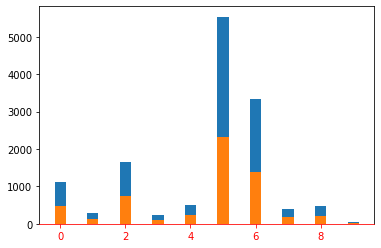

In [49]:
fig, ax = plt.subplots()

ax.spines['bottom'].set_color('red')
ax.xaxis.label.set_color('red')
ax.tick_params(axis='x', colors='red')

ax.bar(pd.unique(train_data['class']), train_data['class'].value_counts(), width = 0.35, 
       label='Train')
ax.bar(pd.unique(train_data['class']), test_data['class'].value_counts(), width = 0.35, 
        label='Test')